<a href="https://colab.research.google.com/github/alexdembele/ExpressionLBPkNN/blob/main/Rob311kNNAlexDembele.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# TP kNN for facial expression recognition
Alex Dembélé






The aim of this notebook is to create a model that detects facial expressions. The model is a kNN that is train on the FER-2013 dataset. It can recognize 7 expressions.

Linking to drive containing the dataset.

In [37]:
#Link to the dataset FER-2013 : https://www.kaggle.com/datasets/msambare/fer2013

from google.colab import drive
drive.mount('/content/drive', force_remount=True)
data_dir = "/content/drive/My Drive/rob311kNN/" #Replace with your drive path

Mounted at /content/drive


Unzip the archive

In [13]:
%cd /content/drive/My Drive/rob311kNN
#!unzip archive.zip



/content/drive/My Drive/rob311kNN


In [14]:
!ls

archive.zip  test  train


Importing libraries

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import feature, io, color
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import os

Creating train and test datasets with histograms from lbp features

In [16]:
#This step takes some times, you can get a coffee !

feelings=["angry","disgust","fear","happy","neutral","sad","surprise"]

X_train,X_test,y_train,y_test=[],[],[],[]

#Train set
for f in feelings:
  print(f)
  path = "/content/drive/My Drive/rob311kNN/train/" + f

  for filename in os.listdir(path):

    path_file = os.path.join(path, filename)

    image = io.imread(path_file)
    if image is not None:
      radius = 10
      n_points = 8 * radius
      lbp_features = feature.local_binary_pattern(image, n_points, radius, method='uniform')
      histogram, _ = np.histogram(lbp_features.ravel(), bins=np.arange(0, n_points + 3), range=(0, n_points + 2))
      histogram = histogram.astype("float")
      histogram /= (histogram.sum() + 1e-7)
      X_train.append(histogram)
      y_train.append(f)


#Test set
for f in feelings:
  print(f)
  path = "/content/drive/My Drive/rob311kNN/test/" + f

  for filename in os.listdir(path):

    path_file = os.path.join(path, filename)

    image = io.imread(path_file)
    if image is not None:
      radius = 10 #Change this parameter to optimize the model
      n_points = 8 * radius
      lbp_features = feature.local_binary_pattern(image, n_points, radius, method='uniform')
      histogram, _ = np.histogram(lbp_features.ravel(), bins=np.arange(0, n_points + 3), range=(0, n_points + 2))
      histogram = histogram.astype("float")
      histogram /= (histogram.sum() + 1e-7)
      X_test.append(histogram)
      y_test.append(f)




angry
disgust
fear
happy
neutral
sad
surprise
angry
disgust
fear
happy
neutral
sad
surprise


Creating kNN

In [17]:
k = 100  # Change this parameter to optimize the model
knn_model = KNeighborsClassifier(n_neighbors=k)




Training kNN

In [18]:
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

Testing kNN

In [19]:
y_pred = knn_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.30231262190025077


Finding best parameters

In [10]:
AccuracyList = []
kList = []

for k in range(1,501,5):
  knn_model = KNeighborsClassifier(n_neighbors=k)
  knn_model.fit(X_train, y_train)
  y_pred = knn_model.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  kList.append(k)
  AccuracyList.append(accuracy)


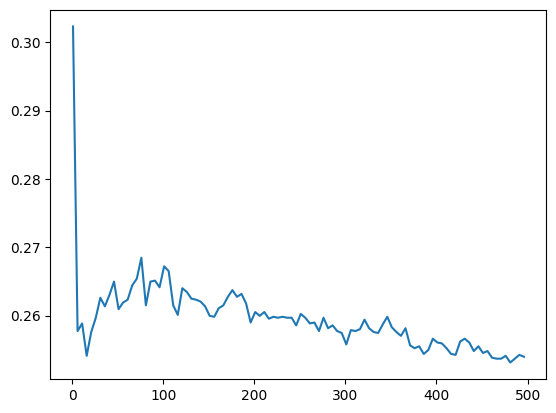

In [11]:
plt.plot(kList,AccuracyList)
plt.show()

LBP is not the best method to process images. Therefore the model does not have a good accuracy.

